# MVPA
based on https://peerherholz.github.io/workshop_weizmann/advanced/machine_learning_nilearn.html

In [1]:
from nilearn import plotting
import numpy as np
import nibabel as nb
import nibabel.processing as nbp
from nilearn.image import resample_to_img
import os

In [2]:
# define paths
root_dir = '/users3/uccibit/alexsayal/BIDS-BRAINPLAYBACK-TASK2'
fmriprep_dir = os.path.join(root_dir, 'derivatives/fmriprep23')
#dataset_dir = os.path.join(root_dir, 'derivatives/mvpa_extracted_data')
dataset_dir = os.path.join(root_dir, 'derivatives/mvpa_ls_a_data')
mask_dir = os.path.join(root_dir, 'derivatives','mni_icbm152_t1_tal_nlin_asym_09c_mask.nii')

In [3]:
# list datasets and concatenate

# find all *_dataset.nii.gz files in dataset_dir
dataset_files = [os.path.join(dataset_dir, f) for f in os.listdir(dataset_dir) if f.endswith('_musicnoise_dataset.nii.gz')]
dataset_files.sort()

# find all *_trial_types.txt files in dataset_dir
label_files = [os.path.join(dataset_dir, f) for f in os.listdir(dataset_dir) if f.endswith('_musicnoise_trial_types.txt')]
label_files.sort()

In [4]:
dataset_files

['/users3/uccibit/alexsayal/BIDS-BRAINPLAYBACK-TASK2/derivatives/mvpa_ls_a_data/sub-01_ses-01_task-02a_run-1_musicnoise_dataset.nii.gz',
 '/users3/uccibit/alexsayal/BIDS-BRAINPLAYBACK-TASK2/derivatives/mvpa_ls_a_data/sub-01_ses-01_task-02a_run-2_musicnoise_dataset.nii.gz',
 '/users3/uccibit/alexsayal/BIDS-BRAINPLAYBACK-TASK2/derivatives/mvpa_ls_a_data/sub-01_ses-01_task-02a_run-3_musicnoise_dataset.nii.gz',
 '/users3/uccibit/alexsayal/BIDS-BRAINPLAYBACK-TASK2/derivatives/mvpa_ls_a_data/sub-01_ses-01_task-02a_run-4_musicnoise_dataset.nii.gz',
 '/users3/uccibit/alexsayal/BIDS-BRAINPLAYBACK-TASK2/derivatives/mvpa_ls_a_data/sub-02_ses-01_task-02a_run-1_musicnoise_dataset.nii.gz',
 '/users3/uccibit/alexsayal/BIDS-BRAINPLAYBACK-TASK2/derivatives/mvpa_ls_a_data/sub-02_ses-01_task-02a_run-2_musicnoise_dataset.nii.gz',
 '/users3/uccibit/alexsayal/BIDS-BRAINPLAYBACK-TASK2/derivatives/mvpa_ls_a_data/sub-02_ses-01_task-02a_run-3_musicnoise_dataset.nii.gz',
 '/users3/uccibit/alexsayal/BIDS-BRAINPLA

In [5]:
label_files

['/users3/uccibit/alexsayal/BIDS-BRAINPLAYBACK-TASK2/derivatives/mvpa_ls_a_data/sub-01_ses-01_task-02a_run-1_musicnoise_trial_types.txt',
 '/users3/uccibit/alexsayal/BIDS-BRAINPLAYBACK-TASK2/derivatives/mvpa_ls_a_data/sub-01_ses-01_task-02a_run-2_musicnoise_trial_types.txt',
 '/users3/uccibit/alexsayal/BIDS-BRAINPLAYBACK-TASK2/derivatives/mvpa_ls_a_data/sub-01_ses-01_task-02a_run-3_musicnoise_trial_types.txt',
 '/users3/uccibit/alexsayal/BIDS-BRAINPLAYBACK-TASK2/derivatives/mvpa_ls_a_data/sub-01_ses-01_task-02a_run-4_musicnoise_trial_types.txt',
 '/users3/uccibit/alexsayal/BIDS-BRAINPLAYBACK-TASK2/derivatives/mvpa_ls_a_data/sub-02_ses-01_task-02a_run-1_musicnoise_trial_types.txt',
 '/users3/uccibit/alexsayal/BIDS-BRAINPLAYBACK-TASK2/derivatives/mvpa_ls_a_data/sub-02_ses-01_task-02a_run-2_musicnoise_trial_types.txt',
 '/users3/uccibit/alexsayal/BIDS-BRAINPLAYBACK-TASK2/derivatives/mvpa_ls_a_data/sub-02_ses-01_task-02a_run-3_musicnoise_trial_types.txt',
 '/users3/uccibit/alexsayal/BIDS-B

In [6]:
#for dd in dataset_files:
#    !nib-ls $dd

/users3/uccibit/alexsayal/BIDS-BRAINPLAYBACK-TASK2/derivatives/mvpa_ls_a_data/sub-01_ses-01_task-02a_run-1_dataset.nii.gz float64 [ 97, 115,  97,  18] 2.00x2.00x2.00x1.00

/users3/uccibit/alexsayal/BIDS-BRAINPLAYBACK-TASK2/derivatives/mvpa_ls_a_data/sub-01_ses-01_task-02a_run-2_dataset.nii.gz float64 [ 97, 115,  97,  18] 2.00x2.00x2.00x1.00

/users3/uccibit/alexsayal/BIDS-BRAINPLAYBACK-TASK2/derivatives/mvpa_ls_a_data/sub-01_ses-01_task-02a_run-3_dataset.nii.gz float64 [ 97, 115,  97,  18] 2.00x2.00x2.00x1.00

/users3/uccibit/alexsayal/BIDS-BRAINPLAYBACK-TASK2/derivatives/mvpa_ls_a_data/sub-01_ses-01_task-02a_run-4_dataset.nii.gz float64 [ 97, 115,  97,  18] 2.00x2.00x2.00x1.00

/users3/uccibit/alexsayal/BIDS-BRAINPLAYBACK-TASK2/derivatives/mvpa_ls_a_data/sub-02_ses-01_task-02a_run-1_dataset.nii.gz float64 [ 97, 115,  97,  18] 2.00x2.00x2.00x1.00

/users3/uccibit/alexsayal/BIDS-BRAINPLAYBACK-TASK2/derivatives/mvpa_ls_a_data/sub-02_ses-01_task-02a_run-2_dataset.nii.gz float64 [ 97, 115,

In [6]:
# concatenate all datasets
D = nb.concat_images(dataset_files, axis=3)

In [7]:
D.shape

(97, 115, 97, 1924)

In [8]:
# concatenate all labels into a single string array
labels = np.concatenate([np.loadtxt(l, dtype=str) for l in label_files])

# trim each label to remove '___1' and '___2' suffixes
#labels = np.array([l.split('___')[0] for l in labels])

In [9]:
labels.shape

(1924,)

In [10]:
mask = nb.load(mask_dir)
mask_downsampled = nbp.resample_to_output(mask, [2,2,2])

mask_resampled = resample_to_img(mask_downsampled, D)

# Binarize ROI template
data_binary = np.array(mask_resampled.get_fdata()>=1, dtype=np.int8)

# Dilate binary mask once
from scipy.ndimage import binary_dilation
data_dilated = binary_dilation(data_binary, iterations=2).astype(np.int8)

# Save binary mask in NIfTI image
mask_resampled2 = nb.Nifti1Image(data_dilated, mask_resampled.affine, mask_resampled.header)
mask_resampled2.set_data_dtype('i1')

from nilearn.input_data import NiftiMasker
masker = NiftiMasker(mask_img=mask_resampled2, standardize=False, detrend=False)
samples = masker.fit_transform(D)
print(samples)


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [11]:
print(samples.shape)

(1924, 260741)


In [12]:
masked_epi = masker.inverse_transform(samples)

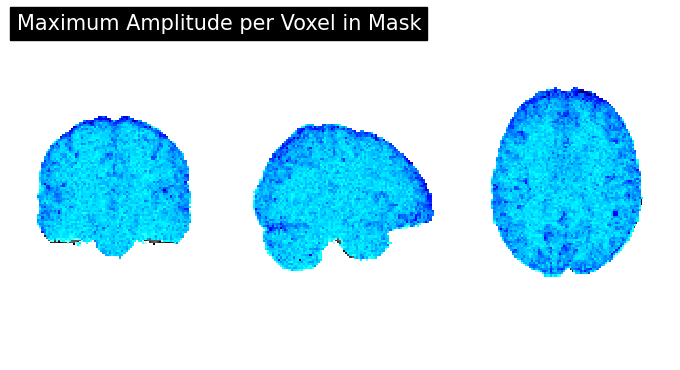

In [13]:
from nilearn.image import math_img
from nilearn.plotting import plot_stat_map

max_zscores = math_img("np.abs(img).max(axis=3)", img=masked_epi)
plot_stat_map(max_zscores, dim=-.5, cut_coords=[33, -20, 20],
              draw_cross=False, annotate=False, colorbar=False,
              title='Maximum Amplitude per Voxel in Mask')

In [14]:
# generate an array of chunk labels
# so 2 x 4 x 9 ones, 2 x 4 x 9 twos, etc. up to twelve
chunks = np.repeat(np.arange(1,14), 18*4+19*4)
#chunks = np.ravel([np.zeros(9),np.ones(9)])
chunks.shape

(1924,)

In [15]:
# Let's specify the classifier
from sklearn.svm import LinearSVC
clf = LinearSVC(penalty='l2', loss='squared_hinge', max_iter=1000)

In [16]:
# Perform the cross validation (takes time to compute)
from sklearn.model_selection import LeaveOneGroupOut, cross_val_score
cv_scores = cross_val_score(estimator=clf,
                            X=samples,
                            y=labels,
                            groups=chunks,
                            cv=LeaveOneGroupOut(),
                            n_jobs=30,
                            verbose=1)

[Parallel(n_jobs=30)]: Using backend LokyBackend with 30 concurrent workers.


: 

: 

: 

In [21]:
print('Average accuracy = %.02f percent\n' % (cv_scores.mean() * 100))
print('Accuracy per fold:', cv_scores, sep='\n')

Average accuracy = 11.97 percent

Accuracy per fold:
[0.11111111 0.15277778 0.15277778 0.19444444 0.09722222 0.13888889
 0.06944444 0.13888889 0.09722222 0.06944444 0.11111111 0.08333333
 0.13888889]


In [19]:
# Import the permuation function
# from sklearn.model_selection import permutation_test_score

In [20]:
# Run the permuation cross-validation
# null_cv_scores = permutation_test_score(estimator=clf,
#                                         X=samples,
#                                         y=labels,
#                                         groups=chunks,
#                                         cv=LeaveOneGroupOut(),
#                                         n_permutations=100,
#                                         n_jobs=30,
#                                         verbose=1)

In [21]:
print('Prediction accuracy: %.02f' % (null_cv_scores[0] * 100),
      'p-value: %.04f' % (null_cv_scores[2]),
      sep='\n')

NameError: name 'null_cv_scores' is not defined